<img src="https://drive.google.com/uc?export=view&id=1x-QAgitB-S5rxGGDqxsJ299ZQTfYtOhb" width=180, align="center"/>

Master's degree in Intelligent Systems

Subject: 11754 - Deep Learning

Year: 2023-2024

Professor: Miguel Ángel Calafat Torrens

In [2]:
# This cell connects to your drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB3'
%ls -l

# Here the path of the project folder (which is where this file is) is inserted
# into the python path. There's nothing to do; just execute the cell.
import pathlib
import sys

PROJECT_DIR = str(pathlib.Path().resolve())
sys.path.append(PROJECT_DIR)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB3
total 274
-rw------- 1 root root  10767 Mar 25 14:41 helper_PR3.py
-rw------- 1 root root 104340 Apr 11 23:08 LAB-3.ipynb
-rw------- 1 root root 160611 Mar 25 15:06 LSS3-Pytorch.ipynb
drwx------ 2 root root   4096 Mar 25 14:46 __pycache__/


In [3]:
# Importing some libraries
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import helper_PR3 as hp
from google.colab import files
from IPython.display import clear_output

In [4]:
# Random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

In [5]:
# This is a way to view the content of the help file without having to edit it
# in a new tab. You can also browse to it through the left bar.
files.view('helper_PR3.py')

<IPython.core.display.Javascript object>

In [6]:
# Define the global variable 'device' to be used where appropriate
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cpu


# Problem 1

In the following exercises you will be supplied with a cloud of points and it is intended that you will be able to train **the simplest possible model that correctly classifies all the points**.

In this case it is only a question of classifying the training points, so don't worry about overfitting.


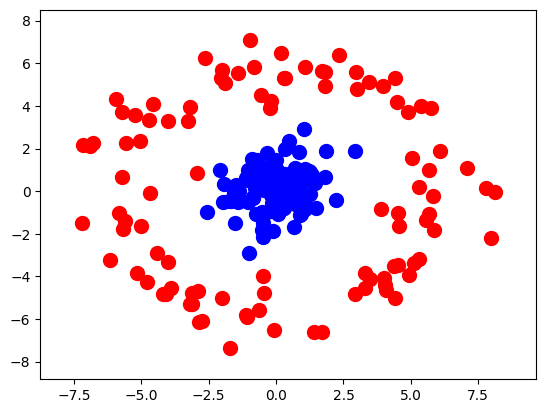

In [7]:
# Creation of a cloud of dots.

# Generate dots_bck test (background) and dots ground truth
dots_bck, dots_gt = hp.p_gen1(100)

# Create batches of 20 elements
inputs, labels = hp.batch_it(20, dots_gt)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

### Training function

A training function is given to you, so you don't have to deal with it. You can just use it as in the example below

In [8]:
# Train function
def train(n_epochs, model, optimizer, criterion, inputs, labels, dots_tst,
          dots_gt, each=2):
    """
    A training function with graphical info every "each" epochs.

    You don't have to tweak anything here. Just take into account the number
    of epochs and the "each" parameter when you call this function.
    """
    acum_loss = []
    model = model.to(DEVICE)
    for epoch in range(n_epochs):
        batch_loss = 0.0
        for Xb, Yb in zip(inputs, labels):
            Xb, Yb = Xb.to(DEVICE), Yb.to(DEVICE)
            # Training algorithm

            # Reset the gradients
            optimizer.zero_grad()

            # Forward pass
            Yp = model.forward(Xb)

            # Loss
            loss = criterion(Yp, Yb)

            # Backpropagation
            loss.backward()

            # Update weights
            optimizer.step()

            batch_loss += loss.item()

        # Loss log per epoch
        acum_loss.append(batch_loss)

        # Show results every "each" epochs.
        if epoch % each == 0:
            print('Epoch {}: loss = {}'.format(epoch, batch_loss))

            # The grid of points that make up the background is collected
            t_test_points = torch.from_numpy(dots_tst[:2, :].T).to(DEVICE)

            # The outputs of the model are calculated, both for the points that
            # make up the background and for the cloud of points to be
            # classified
            with torch.no_grad():
                model.eval()
                y_test = model.forward(t_test_points)
                y_tr_predict = (model.forward(inputs.reshape(-1, 2).to(
                    DEVICE)) >= 0.5).float()

            # Accuracy is calculated
            hp.acc(y_tr_predict, labels)

            # Transform tensors to np-arrays to be used in my_plot() function
            y_test = y_test.cpu().numpy().round().T
            test_block = np.concatenate((dots_tst[:2, :], y_test), axis=0)
            clear_output(wait=True)
            hp.my_plot(test_block, dots_gt)

            model.train()

    # Accuracy
    with torch.no_grad():
        model.eval()
        y_tr_predict = (model.forward(inputs.reshape(-1, 2).to(
            DEVICE)) >= 0.5).float()

    # Accuracy is calculated
    hp.acc(y_tr_predict, labels)

    return model, acum_loss

### Set up for training

At this point some start configuration is given to you, just as an example; but you will need to change it (at least the model) to reach the expected results.

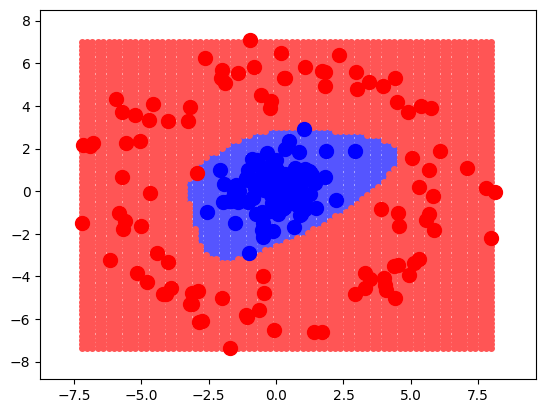

Acc: 99.5000


In [41]:
class Network_01(nn.Module):

# dataset A
# 1 hidden layer, 2 feature input, 3 neurons
# https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=3&seed=0.22680&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


# Para que pueda hacer la clasificación he necesitado 5 neuronas en la hidden layer en vez de las 3 neuronas utilizadas en la página web y 500 epochs


    def __init__(self):
        super().__init__()
        # Define the architecture
        self.fc1 = nn.Linear(in_features=2, out_features=5)  # 2 input features, 5 neurons in the first hidden layer
        self.fc2 = nn.Linear(in_features=5, out_features=1)  # 1 output

        # Define activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

np.random.seed(SEED)
torch.manual_seed(SEED)

# Instanciate the model
model = Network_01()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
model, _ = train(500, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, 2)


Now you see that the defined network is not complex enough to be able to correctly classify all the points.

First of all visit this [link](https://playground.tensorflow.org)

In the link above you will find a demo where you can define your custom neural network trying to fit it to different datasets. Play with it with the most similar dataset (the first one), to check what's your simplest network that can fit correctly.

Once you decide your network, define it (substitute the perceptron network given to you by your choice) and run the simulation again.

Feel free to tinker all the hiperparameters you need.

Hint: In the web simulation select:

* No regularization
* Problem type: Classification
* Discretize output: Enabled

# Problem 2

Repeat in the web the problem above with the rest of datasets (b, c and d in the image below).


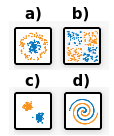

# Problem 3

Repeat the steps of problem 1 with the next cloud of points. In this case **you don't have to correctly classify all the points**; it is simply a matter of finding a network that you think classifies well enough without overfitting.

You just have to inform here the simplest model that correctly classifies all the points.

Note that you don't have to solve the problem in the notebook, since the datasets aren't given to you. Everything has to be done in the web. Here you have to show the results.

Obviously, you could need a different model for each different dataset.

**Answer:**

a) The model of the problem 1  

b) Dataset B

1 hidden layer, 2 feature input, 3 or 4 neurons (with 3 it has more loss)
https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=4&seed=0.02726&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false 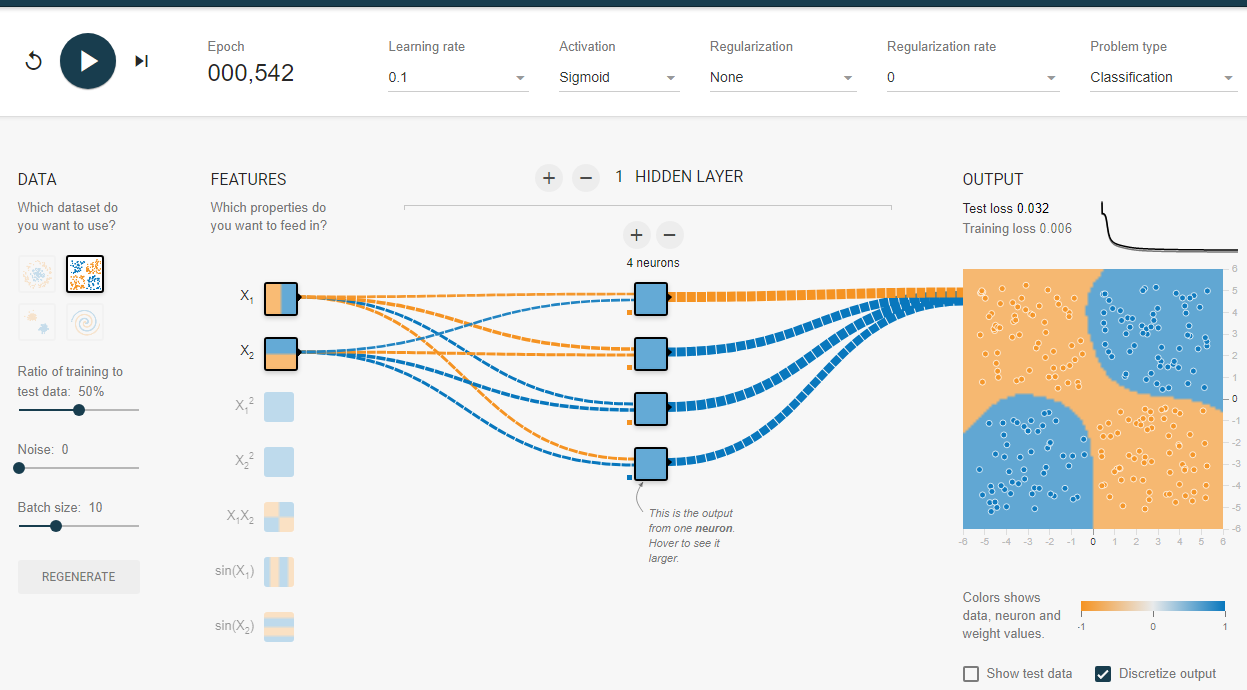

c) Dataset C

1 hidden layer, 2 feature input, 1 neuron
https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.46945&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

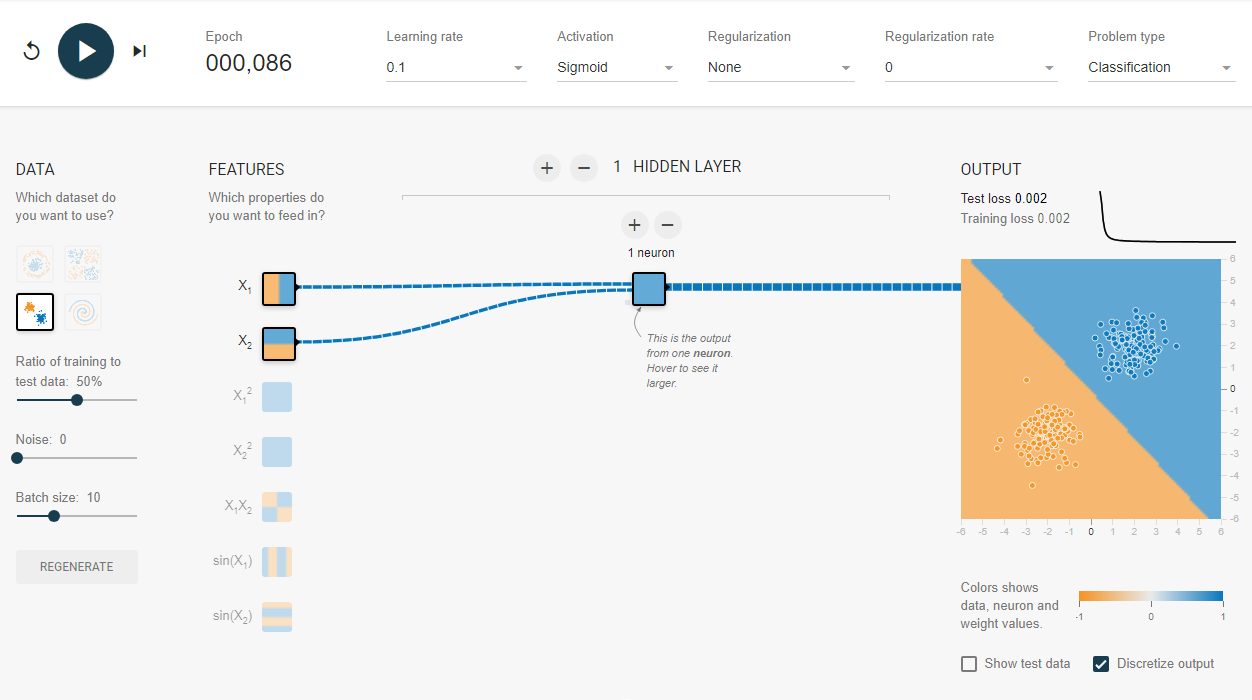
  
d) Dataset D

1 hidden layer, 2 features and 2 sin features, 6 neurons
https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=6&seed=0.73417&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false
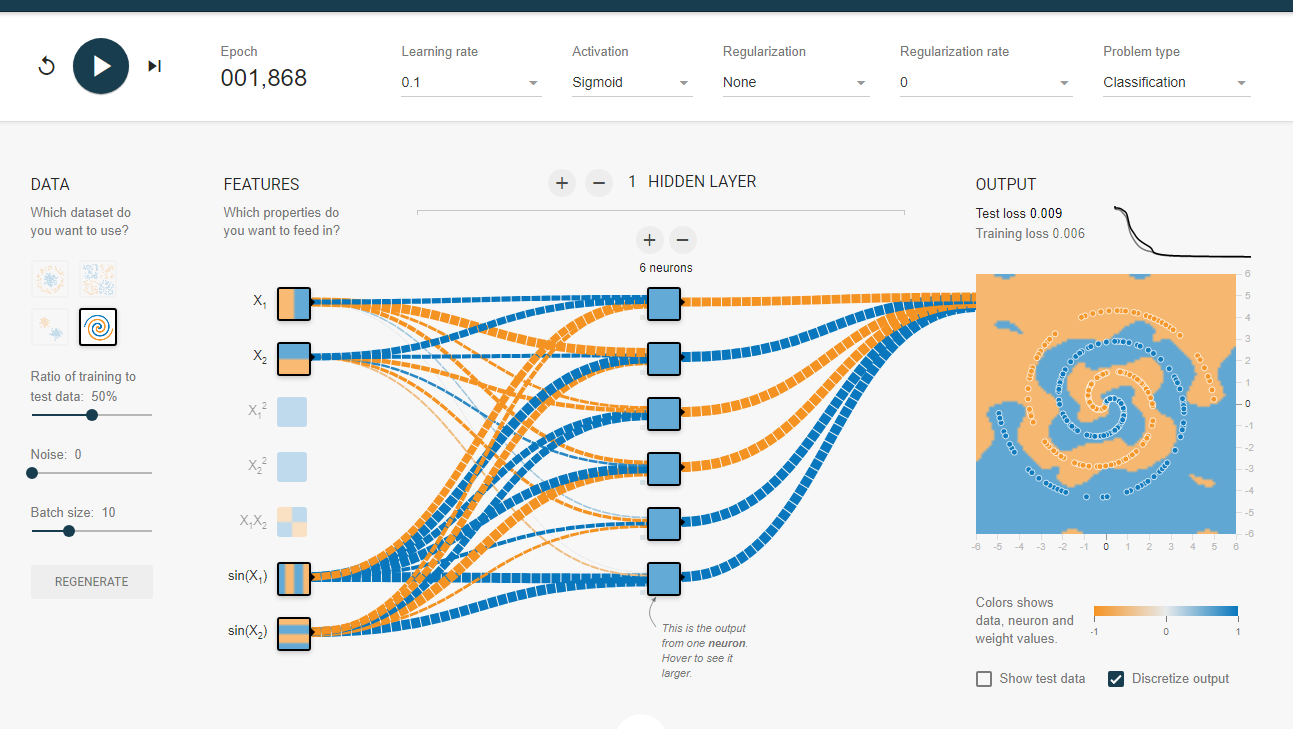

Other solution without using sin(X) features:

3 hidden layer, 2 features, 8 neurons in first hidden layer, 6 neurons in second hidden layer and 2 in last hidden layer. Using Tanh activation function.

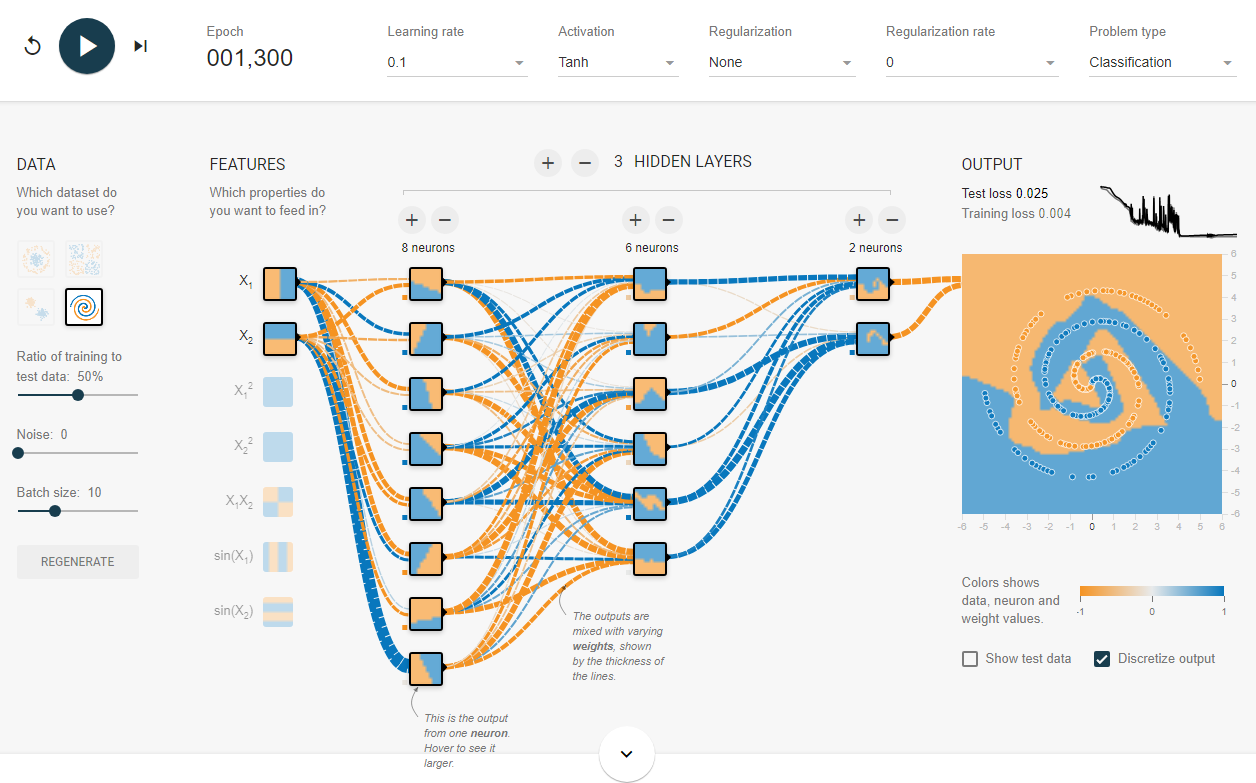

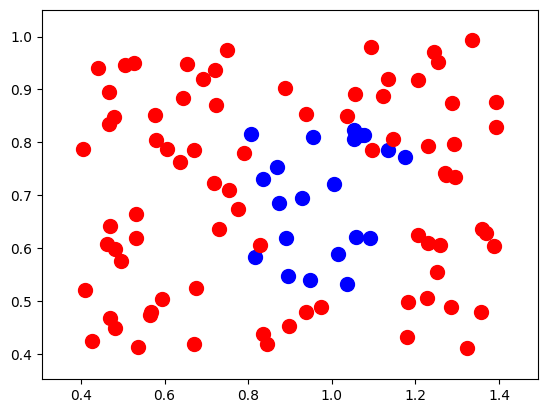

In [96]:
# Creation of a cloud of dots.

# Generate dots_bck test (background) and dots ground truth
dots_bck, dots_gt = hp.p_gen2(100)

# Create batches of 20 elements
inputs, labels = hp.batch_it(20, dots_gt)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

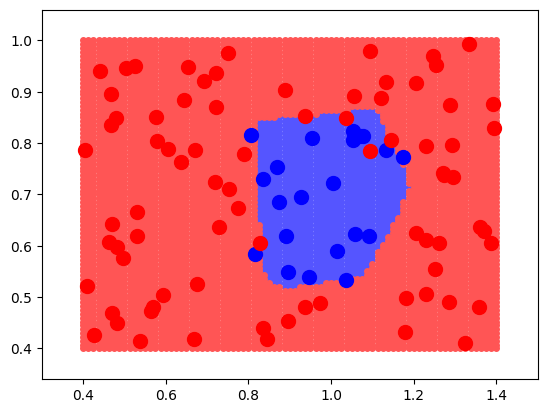

Acc: 92.0000


In [98]:
class Network_02(nn.Module):

    def __init__(self):
        super().__init__()
        # Start_________________________________________________________________
        # Define the architecture
        self.fc1 = nn.Linear(in_features=2, out_features=20)
        self.fc2 = nn.Linear(in_features=20, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=1)
        # Define activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        # End___________________________________________________________________


    def forward(self, x):
        # Start_________________________________________________________________
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        # End___________________________________________________________________
        return x

# Instanciate the model
model = Network_02()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
n_epochs = 2000
each = 20
model, _ = train(n_epochs, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, each)

# Problem 4:

Repeat the problem with the next dataset. In this case I want you to insanely overfit the model so it classifies correctly all the points. But don't forget to select the simplest model that can do the job.

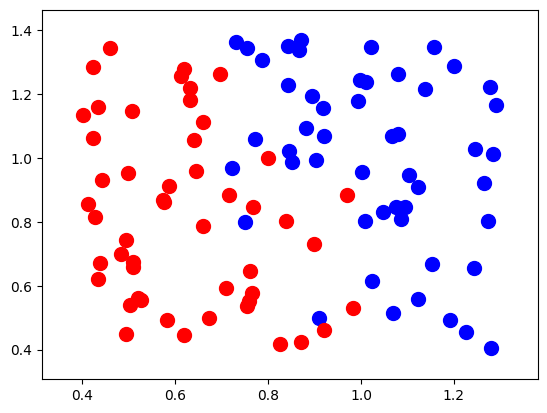

In [99]:
# Creation of a cloud of dots.

# Generate dots_bck test (background) and dots ground truth
dots_bck, dots_gt = hp.p_gen3(100)

# Create batches of 20 elements
inputs, labels = hp.batch_it(20, dots_gt)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

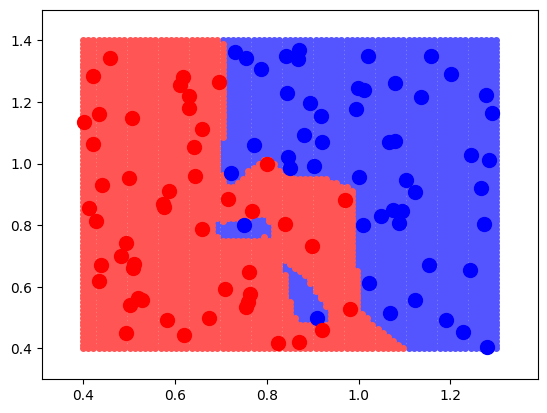

Acc: 100.0000


In [107]:
class Network_03(nn.Module):

    def __init__(self):
        super().__init__()
        # Start_________________________________________________________________
        # Define the architecture
        # To overfit our model we can increase the model's capacity and train it for more epochs
        self.fc1 = nn.Linear(in_features=2, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=30)
        self.fc3 = nn.Linear(in_features=30, out_features=15)
        self.fc4 = nn.Linear(in_features=15, out_features=1)
        # Define activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        # End___________________________________________________________________


    def forward(self, x):
        # Start_________________________________________________________________
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        # End___________________________________________________________________
        return x

# Instanciate the model
model = Network_03()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
n_epochs = 15000
each = 50
model, _ = train(n_epochs, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, each)